## Text Sentiment Analysis 
***
Classification is the process of predicting the class of given data points. Classes are sometimes called targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). Classification belongs to the category of supervised learning where the targets also provided with the input data. A classifier utilizes some training data to understand how given input variables relate to the class. When applied particularly to identify the classifications of sentiments, the classification process trains using a label set of data points with the assigned sentiments. 
For our Solution - we are comparing 3 different models to analyze the Accuracy of the sentiment detection across their applications to identify the most appropriate (Accurate model for use). This is done through initially creating a comparison between the measurement metrics of individual models and then compiling to compare all the results. 


<ul>
<li><a id = "Libraries">Importing Libraries</a></li>
<li><a id = "Format">Formating The Dataset</a></li>
<li><a id = "Explor" > Exploring The Dataset</a></li>
<li><a id = "pre"  >Preprocessing The Dataset</a></li>
<li><a id = "ML"  >Training The Model</a></li>
<li><a id = "rst"  >Exploring The Results</a></li>

</ul>




***

### Library and Data Loading
<a id = 'Libraries'><a/>

In [1]:
#Libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import make_pipeline
import pickle
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer


***
<a id = 'Format'><a/>
### Data Formating 
   The Data used for the training Set was extracted from Kaggle under the label of Text classification datasets - the original dataset is extracted from the USL data Repository online holding a prelabeled datasets but are extracted from kaggle. The dataset can be accessed here (Data). The data set holds [UserName,  ScreenName, Location, Tweetat, original Tweets - holding initially 50,000 before data cleaning 

In [2]:
#Loading the Datasets
train_set = pd.read_csv('Corona_NLP_train.csv', encoding = "latin1")
test_set = pd.read_csv('Corona_NLP_test.csv', encoding = "latin1")

In [3]:
unrelevant_features = ["UserName","ScreenName","Location","TweetAt"]

train_set.drop(unrelevant_features,inplace=True,axis=1)
test_set.drop(unrelevant_features,inplace=True,axis=1)
train_set.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
#Identify the Number of Labeled Tweeets
train_set["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [5]:
#Seperating the  positive Values
positives = train_set[(train_set["Sentiment"] == "Positive") | (train_set["Sentiment"] == "Extremely Positive")]
positives_test = test_set[(test_set["Sentiment"] == "Positive") | (test_set["Sentiment"] == "Extremely Positive")]
print(positives["Sentiment"].value_counts())
positives.head()

Positive              11422
Extremely Positive     6624
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive


In [6]:
#Seperating the Negative Values
negatives = train_set[(train_set["Sentiment"] == "Negative") | (train_set["Sentiment"] == "Extremely Negative")]
negatives_test = test_set[(test_set["Sentiment"] == "Negative") | (test_set["Sentiment"] == "Extremely Negative")]
print(negatives["Sentiment"].value_counts())
negatives.head()

Negative              9917
Extremely Negative    5481
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
9,"For corona prevention,we should stop to buy th...",Negative
20,with 100 nations inficted with covid 19 th...,Extremely Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative


In [7]:
#Seperating the Neutral Vallues
neutrals = train_set[train_set["Sentiment"] == "Neutral"]
neutrals_test = test_set[test_set["Sentiment"] == "Neutral"]
print(neutrals["Sentiment"].value_counts())
neutrals.head()

Neutral    7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,Was at the supermarket today. Didn't buy toile...,Neutral
10,All month there hasn't been crowding in the su...,Neutral
16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral


In [8]:
#Converting Labels into Integers for referencing 
# negatives as 0, neutrals as 1 and positives as 2.
import warnings as wrn
wrn.filterwarnings('ignore')

negatives["Sentiment"] = 0 
negatives_test["Sentiment"] = 0

positives["Sentiment"] = 2
positives_test["Sentiment"] = 2

neutrals["Sentiment"] = 1
neutrals_test["Sentiment"] = 1

negatives.head()


,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",0
9,"For corona prevention,we should stop to buy th...",0
20,with 100 nations inficted with covid 19 th...,0
24,@10DowningStreet @grantshapps what is being do...,0
26,In preparation for higher demand and a potenti...,0


In [9]:
#we Concatinate the Data For ease of processing

data = pd.concat([positives,
                  positives_test,
                  neutrals,
                  neutrals_test,
                  negatives,
                  negatives_test
                 ],axis=0)

data.reset_index(inplace=True)

***
<a id = 'Explor'><a/>

    
### Exploritory data analysis and Wrangling 


In [10]:
data.shape

(44955, 3)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          44955 non-null  int64 
 1   OriginalTweet  44955 non-null  object
 2   Sentiment      44955 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
#examining a Random texts to analyze
import random
for i in range(1,10):
    random_ind = random.randint(0,len(data))
    print(str(data["OriginalTweet"][random_ind]),end="\nLabel: ")
    print(str(data["Sentiment"][random_ind]),end="\n\n")

The COVID-19 crisis is driving the global growth of e-commerce sales, with millions of consumers worldwide in quarantine shopping for goods, services and entertainment online. Transaction volumes in most retail sectors have seen a 7... https://t.co/hsWCmcLCIy via @InfoSecHotSpot https://t.co/CytCMMnngg
Label: 2

How about free delivery and no service fee for seniors ordering online?&gt;&gt;&gt;&gt;&gt;&gt; La Habra supermarket offers special hours for shoppers 65 and older amid COVID-19 crisis https://t.co/4wQE7vzr3M
Label: 2

My non existent income is not currently supporting my online shopping needs right now #selfisolating #StayHome #coronavirus
Label: 0

Alizeh Shah and Noman Sami Trolled for Collecting Ration from #Grocery Store - https://t.co/RSr0U1oa8s

#AlizehShah #NomanSami #CoronaVirus #coronavirusinpakistan https://t.co/SWnVUkFtoD
Label: 1

#supermarket #visit #excitement of the week #milk #bread #eggs #butter #fruit #supermarketsushi #ugh #socialdistancing #california #cali

**Notes of  Data Cleaning 

In [13]:
#We Create a Frequency Disturbution to study the segmentation of words for each sentiment 
positiveFD = nltk.FreqDist(word for text in data[data["Sentiment"] == 2]["OriginalTweet"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in data[data["Sentiment"] == 0]["OriginalTweet"] for word in text.lower().split())
neutralDF = nltk.FreqDist(word  for text in data[data["Sentiment"] == 1]["OriginalTweet"] for word in text.lower().split())

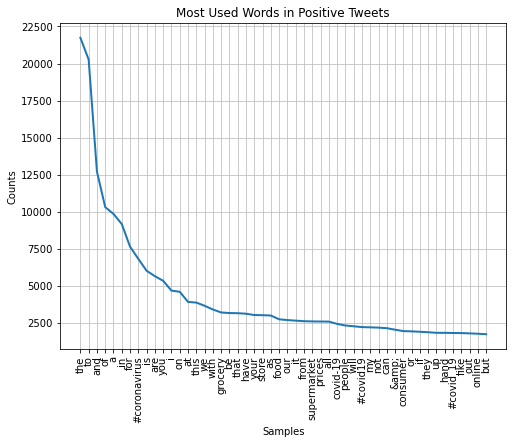

In [14]:
#Viewing the Most Used Positive Words
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Tweets")
positiveFD.plot(50)
plt.show()

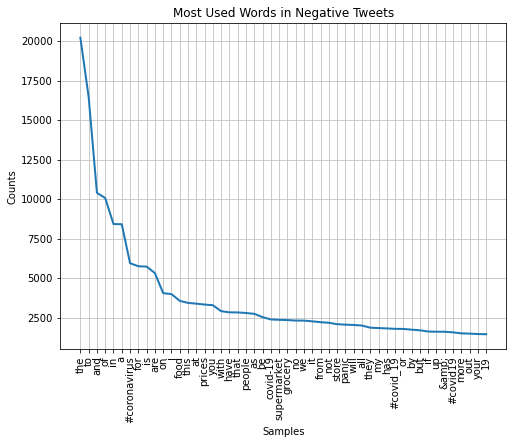

In [15]:
#Viewing the Most used Negative words
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Tweets")
negativeFD.plot(50)
plt.show()

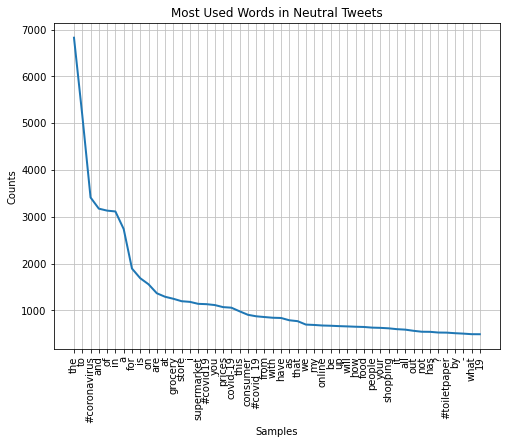

In [16]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Neutral Tweets")
neutralDF.plot(50)
plt.show()

*** 
<a id = 'pre'><a/>
### Data Prepocessig 
- Cleaning Links: We'll clean all website links using regular expressions
- Cleaning Everything Except Alphabetical and Numerical Characters: We'll clean unrelevant digits using regular expressions
- Tokenizing and Lemmatizing: We'll split texts into their words and convert words to their base form (dogs=>dog)
- Removing Stopwords: We'll remove words that have no special meaning (such as the,will,was)
- Joining Prepared Strings: We'll join the words
- Bag of Words Approach: We'll create a bag of word. In bag of words approach each feature shows whether the text contains the word or not. For instance if our text contains grocery word, its grocery feature will be 1 if not it will be 0.

In [17]:
#Cleaning the Data
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["OriginalTweet"]:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)

In [18]:
#reviewing Data After Cleaning 
for i in range(0,5):
    print(cleanedData[i],end="\n\n")

advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order

coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak

food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral

news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report

cashier grocery store wa sharing insight covid 19 prove credibility commented civics class know talking



In [19]:
data.info

<bound method DataFrame.info of        index                                      OriginalTweet  Sentiment
0          1  advice Talk to your neighbours family to excha...          2
1          2  Coronavirus Australia: Woolworths to give elde...          2
2          3  My food stock is not the only one which is emp...          2
3          5  As news of the regionÂs first confirmed COVID...          2
4          6  Cashier at grocery store was sharing his insig...          2
...      ...                                                ...        ...
44950   3787  Its funny seeing all these people fight and pa...          0
44951   3791  With Gov Hogan's announcement that all bars, r...          0
44952   3792  @RicePolitics @MDCounties Craig, will you call...          0
44953   3794  Did you panic buy a lot of non-perishable item...          0
44954   3796  Gov need to do somethings instead of biar je r...          0

[44955 rows x 3 columns]>

In [20]:
# we can create our bag of words - combination words often used together
vectorizer = CountVectorizer(max_features=10000)

BOW = vectorizer.fit_transform(cleanedData)

In [21]:

    
pickle_out = open("bow_pickle.pickle", mode = "wb")
pickle.dump(BOW, pickle_out)
pickle_out.close()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["Sentiment"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33716, 10000)
(11239, 10000)
(33716,)
(11239,)



<a id = 'ML'><a/>
***
### Applying Machine Learning Classifiers 
Before Creating the models we first split the cleaned data set into a train and test model . one that will be used to train the models with the labelled division - and one that will be used to test and calculate the Accuracy of the Model. For our model training we selected 3 models specifically that we will Train and review. 

SVM Model : Support Vector Machine is a linear model for classification and regression problems. an algorithm that takes the data as an input and outputs a line that separates those classes if possible. SVM tries to make a decision boundary in such a way that the separation between the two classes is as wide as possible and as such creates a clear division of classes. SVMs are based on the idea of finding a hyperplane that best divides a dataset into required classes. 
Logistic Regression : Logistic Regression is a kind of parametric classification model. Logistic regression models are models that have a certain fixed number of parameters that depend on the number of input features, and they output categorical prediction, like for example if a plant belongs to a certain species or not. In Logistic Regression, we don’t directly fit a straight line to our data like in linear regression. Instead, we fit a S shaped curve, called Sigmoid, to our observations.
Decision Tree : A decision tree is a machine learning algorithm that partitions the data into subsets. The partitioning process starts with a binary split and continues until no further splits can be made.


In [43]:
start_time = time.time()

#Training a SVC Model
SVCModel = SVC()
svm_Model=SVCModel.fit(x_train,y_train)
SVMprediction = svm_Model.predict(x_test)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 694.92 seconds


In [23]:
start_time = time.time()

#Training a Logistic Regression Model

LogisticRegressionModel = LogisticRegression()
lr_model = LogisticRegressionModel.fit(x_train,y_train)
lr_Prediction = lr_model.predict(x_test)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting Logical Regression took {} seconds".format(process_time))

Fitting Logical Regression took 2.11 seconds


In [24]:
start_time = time.time()

#Training  a Decision Tree Model
DecisionTreeClassifierModel = DecisionTreeClassifier() 
dt_model = DecisionTreeClassifierModel.fit(x_train, y_train)
dt_prediction = dt_model.predict(x_test)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting Decision Tree Classifier Model took {} seconds".format(process_time))

Fitting Decision Tree Classifier Model took 11.89 seconds


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<a id = 'rst'><a/>
***
### Comparing Model Outcomes:
For this segment of the report we are exploring the application of the different Models. To assess each model individually we will first be observing the 4 metrics of accuracy :
Precision :  is the fraction of relevant instances among the retrieved instances.
Recall :  is the fraction of relevant instances that were retrieved.
F1 - Score :  the weighted average of Precision and Recall.
Confusion Matrix: Each row in a confusion matrix represents an actual class, while each column represents a predicted class.


              precision    recall  f1-score   support

           0       0.78      0.77      0.77      4198
           1       0.70      0.66      0.68      2114
           2       0.80      0.82      0.81      4927

    accuracy                           0.77     11239
   macro avg       0.76      0.75      0.75     11239
weighted avg       0.77      0.77      0.77     11239

Confusion matrix, without normalization
[[1399  387    0]
 [ 277 4061    0]
 [   0    0    0]]


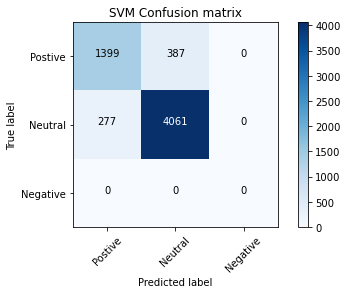

In [44]:
# Compute confusion matrix
cnf_matrix_svc = confusion_matrix(y_test, SVMprediction, labels=[1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, SVMprediction))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svc, classes=['Postive','Neutral','Negative'],normalize= False,  title='SVM Confusion matrix')

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4198
           1       0.69      0.70      0.70      2114
           2       0.83      0.84      0.84      4927

    accuracy                           0.80     11239
   macro avg       0.78      0.78      0.78     11239
weighted avg       0.80      0.80      0.80     11239

Confusion matrix, without normalization
[[1474  316    0]
 [ 311 4143    0]
 [   0    0    0]]


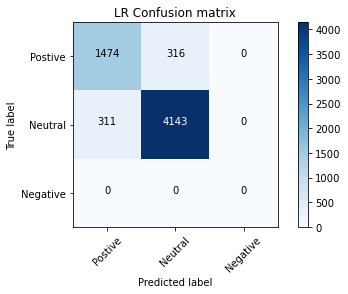

In [28]:
# Compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_test, lr_Prediction, labels=[1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, lr_Prediction))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['Postive','Neutral','Negative'],normalize= False,  title='LR Confusion matrix')

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4198
           1       0.64      0.68      0.66      2114
           2       0.75      0.73      0.74      4927

    accuracy                           0.70     11239
   macro avg       0.69      0.70      0.69     11239
weighted avg       0.70      0.70      0.70     11239

Confusion matrix, without normalization
[[1474  316    0]
 [ 311 4143    0]
 [   0    0    0]]


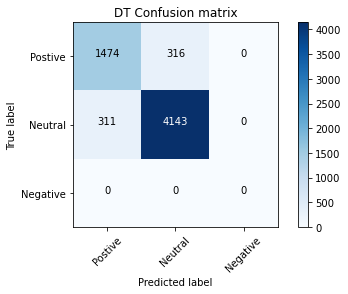

In [29]:
# Compute confusion matrix
cnf_matrix_DT = confusion_matrix(y_test, dt_prediction, labels=[1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, dt_prediction))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['Postive','Neutral','Negative'],normalize= False,  title='DT Confusion matrix')

In [30]:
data.shape

(44955, 3)

In [31]:
data.head()

,index,OriginalTweet,Sentiment
0,1,advice Talk to your neighbours family to excha...,2
1,2,Coronavirus Australia: Woolworths to give elde...,2
2,3,My food stock is not the only one which is emp...,2
3,5,As news of the regionÂs first confirmed COVID...,2
4,6,Cashier at grocery store was sharing his insig...,2


In [45]:
#Compiling the Model Results to compare Accuracy
models=['Logistic Regression','SVM','DecisionTree Classifier']
preds=[lr_Prediction,SVMprediction,dt_prediction]
acc=[]
for i in preds:
    accscore=accuracy_score(i,y_test).round(2)
    acc.append(accscore)

In [46]:
datasummary=zip(models,acc)
result=pd.DataFrame(datasummary,columns=['Model','Accuracy']).sort_values(["Accuracy"], ascending = False)

In [47]:
result

,Model,Accuracy
0,Logistic Regression,0.80
1,SVM,0.77
2,DecisionTree Classifier,0.70


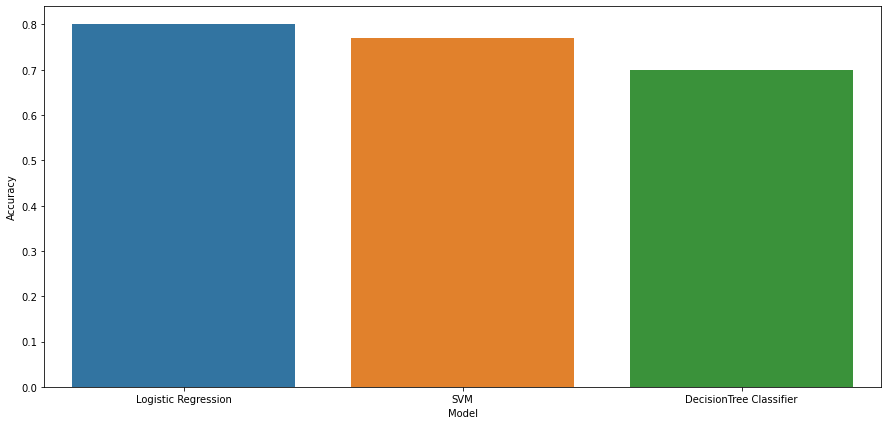

In [48]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Accuracy", data = result)
plt.show()

In [49]:
data.head()

,index,OriginalTweet,Sentiment
0,1,advice talk neighbour family exchange phone nu...,2
1,2,coronavirus australia woolworth give elderly d...,2
2,3,food stock one empty please panic enough food ...,2
3,5,news region first confirmed covid 19 case came...,2
4,6,cashier grocery store wa sharing insight covid...,2


In [33]:
CleanedDataset = pd.DataFrame(data)
CleanedDataset['OriginalTweet'] = cleanedData
CleanedDataset.head()

,index,OriginalTweet,Sentiment
0,1,advice talk neighbour family exchange phone nu...,2
1,2,coronavirus australia woolworth give elderly d...,2
2,3,food stock one empty please panic enough food ...,2
3,5,news region first confirmed covid 19 case came...,2
4,6,cashier grocery store wa sharing insight covid...,2


***
Applying Lime Model

In [34]:
max_features = CleanedDataset.OriginalTweet.str.split().map(lambda x: len(x)).max()
max_features

48

In [35]:

idx = CleanedDataset.OriginalTweet.iloc[965]
idx
#Explainer for LimetextExplainer
c = make_pipeline(vectorizer, lr_model)

class_names = ['Positive','Neutral','Negative']
#choosing to Explain the Max Feature
explainer = LimeTextExplainer(class_names = class_names)
exp = explainer.explain_instance(idx, c.predict_proba, num_features = 5)


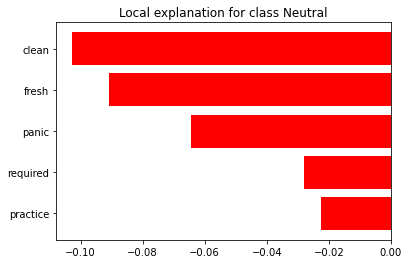

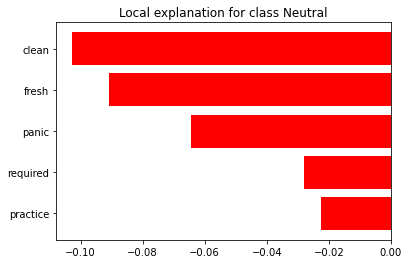

In [36]:
exp.as_pyplot_figure()

In [37]:
exp.show_in_notebook(text = True)

In [38]:
idx2 = CleanedDataset.OriginalTweet.iloc[368]
idx2
d = make_pipeline(vectorizer, dt_model)

class_names = ['Positive','Neutral','Negative']
#choosing to Explain the Max Feature
explainer2 = LimeTextExplainer(class_names = class_names)
exp2 = explainer2.explain_instance(idx2, d.predict_proba, num_features = 5)


In [39]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

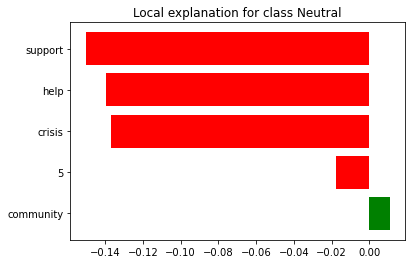

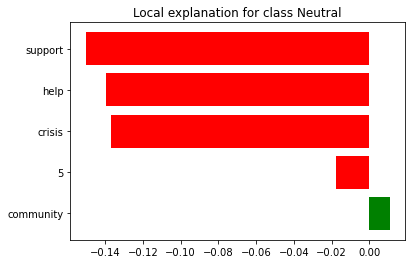

In [40]:
exp2.as_pyplot_figure()

In [41]:
exp2.show_in_notebook(text = True)

In [ ]:
import pickle
pickle_out = open("classifierSvm.pkl", mode = "wb")
pickle.dump(svm_Model, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("classifierDT.pkl", mode = "wb")
pickle.dump(dt_model, pickle_out)
pickle_out.close()


In [ ]:
pickle_out = open("classifierLR.pkl", mode = "wb")
pickle.dump(lr_model, pickle_out)
pickle_out.close()